<a href="https://colab.research.google.com/github/YusukeAoki57/diveintocode-ml/blob/master/week4_%E6%8E%88%E6%A5%AD%E5%89%8D%E8%AA%B2%E9%A1%8C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
iris=load_iris()

In [4]:
iris_data=pd.DataFrame(iris.data,columns=iris.feature_names)
print(iris_data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


課題1 練習のための特徴量とカテゴリの抽出

In [5]:
#targetの生成
all_y=pd.DataFrame(iris.target)
all_y.columns=['Species']

#特徴量との結合
all_xy=pd.merge(iris_data,all_y,left_index=True, right_index=True)

#Targetのvirgicolorとvirginicaのみのデータの生成
part_columns=all_xy[all_xy['Species'] != 0]

#sepal_lengthとpetal_lengthのみのデータの生成
part_all1=part_columns.drop('sepal width (cm)', axis=1)
part_all=part_all1.drop('petal width (cm)', axis=1)
print(part_all)


     sepal length (cm)  petal length (cm)  Species
50                 7.0                4.7        1
51                 6.4                4.5        1
52                 6.9                4.9        1
53                 5.5                4.0        1
54                 6.5                4.6        1
..                 ...                ...      ...
145                6.7                5.2        2
146                6.3                5.0        2
147                6.5                5.2        2
148                6.2                5.4        2
149                5.9                5.1        2

[100 rows x 3 columns]


課題2　データの分析

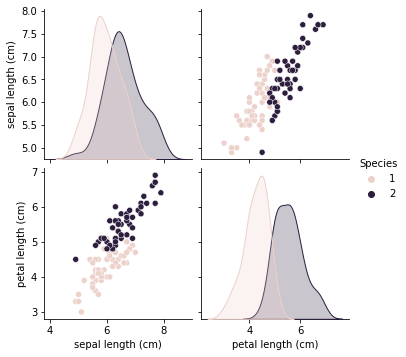

In [6]:
#散布図行列
pg = sns.pairplot(part_all,hue='Species')

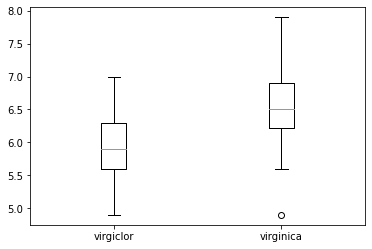

In [7]:
#箱ひげ図 spal length
fig, ax = plt.subplots()
virgiclor_value=part_all[['Species', 'sepal length (cm)']].query('Species ==1')
virginica_value=part_all[['Species', 'sepal length (cm)']].query('Species ==2')

points1=(virgiclor_value.iloc[:,1],virginica_value.iloc[:,1])

bp = ax.boxplot(points1)
ax.set_xticklabels(['virgiclor','virginica'])
plt.show()

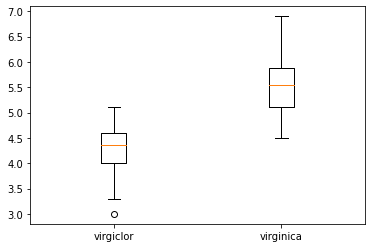

In [8]:
#箱ひげ図 petal length
fig, ax = plt.subplots()
virgiclor_value=part_all[['Species', 'petal length (cm)']].query('Species ==1')
virginica_value=part_all[['Species', 'petal length (cm)']].query('Species ==2')

points2=(virgiclor_value.iloc[:,1],virginica_value.iloc[:,1])

bp = ax.boxplot(points2)
ax.set_xticklabels(['virgiclor','virginica'])
plt.show()

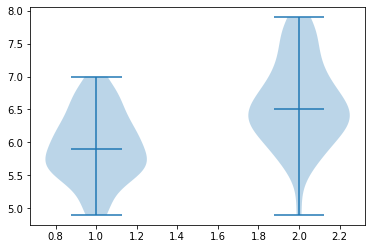

In [9]:
#バイオリン図　spal length
plt.violinplot(points1, showmedians=True)
plt.show()

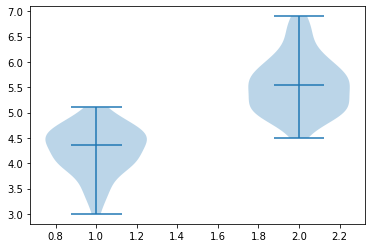

In [10]:
#バイオリン図　petal length
plt.violinplot(points2, showmedians=True)
plt.show()

問題3 前処理・訓練データと検証データの分割

In [11]:
#numpyに変換
y=np.array(part_all.Species)
x=np.array(part_all.iloc[:,:2])

#説明変数と目的変数を訓練データ:テストデータ＝0.75:0.25で分割
y_train,y_test=train_test_split(y, test_size=0.25,random_state=0)
#print(y_test)
x_train,x_test=train_test_split(x, test_size=0.25,random_state=0)
print(x_test)

[[6.8 4.8]
 [6.3 5.6]
 [6.9 4.9]
 [7.6 6.6]
 [7.2 6. ]
 [6.8 5.9]
 [5.6 4.5]
 [6.3 4.9]
 [6.5 5.8]
 [6.7 5.2]
 [6.3 5.6]
 [5.8 5.1]
 [6.4 5.6]
 [6.1 4.7]
 [4.9 3.3]
 [5.5 3.8]
 [6.3 4.9]
 [6.4 4.3]
 [6.  5.1]
 [6.6 4.6]
 [5.  3.3]
 [6.8 5.5]
 [5.5 4. ]
 [5.6 4.9]
 [5.7 4.2]]


問題4 前処理・標準化

In [14]:
#訓練データの説明変数をfit（平均・分散を計算）
sc = StandardScaler()
x_train_fit = sc.fit(x_train)
print(x_train_fit.mean_)
#print(x_train_fit.var_)

#訓練データの説明変数をtransformで標準化
x_train_trf=sc.transform(x_train)
#print(x_train_trf)

#テストデータの説明変数をtransformで標準化：fitについては訓練データで計算済であり、それがテストデータに使用される
x_test_trf=sc.transform(x_test)
#print(x_test_trf)

[6.27466667 4.9       ]


問題5 学習と推定

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_trf,y_train)
#KNeighborsClassifier(...)
y_pred=neigh.predict(x_test_trf)
print(y_pred)
"""
n_neighbors=nのnを変化させた場合のアウトプット

n_neighbors=5の場合
[2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 1 1 1 1 1 1]

n_neighbors=3の場合
[2 2 1 2 1 2 1 1 1 1 1 2 2 1 2 2 2 1 1 2 1 1 2 2 2]

n_neighbors=1の場合
[2 1 1 1 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 1 1 2 1]
"""

"""
授業での質問準備
1.ラベルの位置をどう決めるのか
2.近傍のラベルの種別は任意で設定しているのか（ラベルの値を入れ替えたら結果が逆転しないか）
"""

[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]


'\n授業での質問準備\n1.ラベルの位置をどう決めるのか\n2.近傍のラベルの種別は任意で設定しているのか（ラベルの値を入れ替えたら結果が逆転しないか）\n'

問題6 評価

In [ ]:
from sklearn import metrics

#正解率
ac=metrics.accuracy_score(y_test, y_pred)
print(ac)

#精度（Presicion）
pre=metrics.precision_score(y_test, y_pred)
print(pre)

#再現率（recall）
rec=metrics.recall_score(y_test, y_pred)
print(rec)

#F値
f=metrics.f1_score(y_test, y_pred)
print(f)


0.92
1.0
0.8461538461538461
0.9166666666666666


In [ ]:
#混合行列の作成
from sklearn.metrics import confusion_matrix
mix=confusion_matrix(y_test, y_pred)
print(mix)

[[11  2]
 [ 0 12]]


In [ ]:
#4種類の意味調査

"""
全体定義：4マトリックスでどこの評価をしているかで取るべき箱が異なることでそれぞれの意味も異なる

Accracy:本来ポジティブに分類すべきアイテムをポジティブに分類し、本来ネガティブに分類すべきアイテムをネガティブに分類できた割合
Presicion:「予測値」がどれだけ正解しているかを示す割合
Recall:教師の答えデータに対してどれだけ予測値が正解しているか、という数値
F:精度 (Precision) と検出率 (Recall) をバランス良く持ち合わせているかを示す指標

"""

'\n全体定義：4マトリックスでどこの評価をしているかで取るべき箱が異なることでそれぞれの意味も異なる\n\nAccracy:本来ポジティブに分類すべきアイテムをポジティブに分類し、本来ネガティブに分類すべきアイテムをネガティブに分類できた割合\nPresicion:「予測値」がどれだけ正解しているかを示す割合\nRecall:教師の答えデータに対してどれだけ予測値が正解しているか、という数値\nF:精度 (Precision) と検出率 (Recall) をバランス良く持ち合わせているかを示す指標\n\n'

問題7 可視化

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()



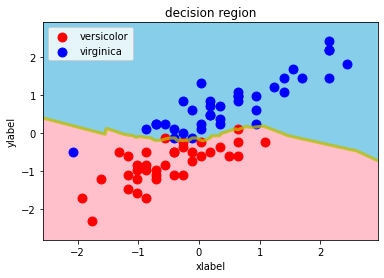

In [ ]:
decision_region(x_train_trf,y_train,model=neigh)

問題8 他手法の学習

In [ ]:
#ロジスティック回帰
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(x_train_trf, y_train) # ロジスティック回帰モデルの重みを学習

#推定
y_pred_lr = lr.predict(x_test_trf)

#評価

ac2=metrics.accuracy_score(y_test, y_pred_lr)
print(ac2)

pre2=metrics.precision_score(y_test, y_pred_lr)
print(pre2)

rec2=metrics.recall_score(y_test, y_pred_lr)
print(rec2)

f2=metrics.f1_score(y_test, y_pred_lr)
print(f2)

0.92
1.0
0.8461538461538461
0.9166666666666666


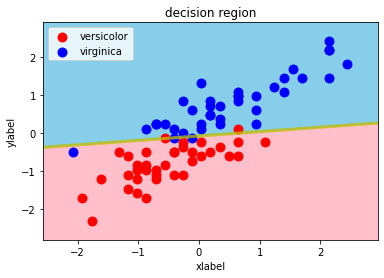

In [ ]:
decision_region(x_train_trf,y_train,model=lr)

In [ ]:
#SVM
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(x_train_trf, y_train)

#推定
y_pred_sv = sv.predict(x_test_trf)

#評価
ac3=metrics.accuracy_score(y_test, y_pred_sv)
print(ac3)

pre3=metrics.precision_score(y_test, y_pred_sv)
print(pre3)

rec3=metrics.recall_score(y_test, y_pred_sv)
print(rec3)

f3=metrics.f1_score(y_test, y_pred_sv)
print(f3)

0.92
1.0
0.8461538461538461
0.9166666666666666


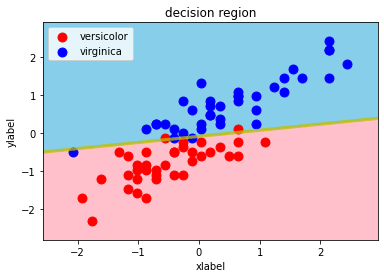

In [ ]:
decision_region(x_train_trf,y_train,model=sv)

In [ ]:
#決定木

from sklearn import tree
tr = tree.DecisionTreeClassifier(max_depth=3)
tr.fit(x_train_trf, y_train)
#推定
y_pred_tr=tr.predict(x_test_trf)

#評価
#評価
ac4=metrics.accuracy_score(y_test, y_pred_tr)
print(ac4)

pre4=metrics.precision_score(y_test, y_pred_tr)
print(pre4)

rec4=metrics.recall_score(y_test, y_pred_tr)
print(rec4)

f4=metrics.f1_score(y_test, y_pred_tr)
print(f4)

0.88
1.0
0.7692307692307693
0.8695652173913044


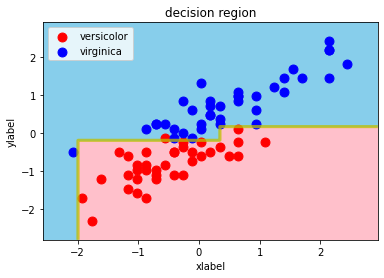

In [ ]:
decision_region(x_train_trf,y_train,model=tr)

In [ ]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=30, n_estimators=30, random_state=42)
rf.fit(x_train_trf, y_train)

#推定
y_pred_rf=rf.predict(x_test_trf)

#評価
ac5=metrics.accuracy_score(y_test, y_pred_rf)
print(ac5)

pre5=metrics.precision_score(y_test, y_pred_rf)
print(pre5)

rec5=metrics.recall_score(y_test, y_pred_rf)
print(rec5)

f5=metrics.f1_score(y_test, y_pred_rf)
print(f5)

0.88
1.0
0.7692307692307693
0.8695652173913044


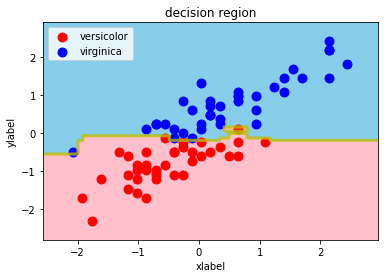

In [ ]:
decision_region(x_train_trf,y_train,model=rf)

In [ ]:
#指標値を一つの表にまとめる
list=[[ac,pre,rec,f],[ac2,pre2,rec2,f2],[ac3,pre3,rec3,f3],[ac4,pre4,rec4,f4],[ac5,pre5,rec5,f5]]
df = pd.DataFrame(list)
df.columns = ['Accuracy','Precision','Recall','F']
df.index = ['K-NN','Logistic','SVM','Tree','RandamTree']
print(df)

            Accuracy  Precision    Recall         F
K-NN            0.92        1.0  0.846154  0.916667
Logistic        0.92        1.0  0.846154  0.916667
SVM             0.92        1.0  0.846154  0.916667
Tree            0.88        1.0  0.769231  0.869565
RandamTree      0.88        1.0  0.769231  0.869565


In [ ]:
#考察
"""
指標値は最近傍法とロジスティック回帰が良い。
決定領域について、決定木とランダムフォレストは凹凸の決定領域としてとらえている
SVMとロジスティック回帰は直線、最近傍法は曲線で捉えている
"""

'\n指標値は最近傍法とロジスティック回帰が良い。\n決定領域について、決定木とランダムフォレストは凹凸の決定領域としてとらえている\nSVMとロジスティック回帰は直線、最近傍法は曲線で捉えている\n'

問題9 （アドバンス課題）標準化の有無の比較

In [ ]:
#関数化

#K-NN
def K_NN(x_tre,x_tes,y_tre):
  neigh2 = KNeighborsClassifier(n_neighbors=3)
  neigh2.fit(x_tre,y_tre)
  #KNeighborsClassifier(...)
  y_pred=neigh2.predict(x_tes)
  return (y_pred,neigh2)

#Logistic
def Logistic(x_tre,x_tes,y_tre):
  lr2 = LogisticRegression() 
  lr2.fit(x_tre, y_tre)
  y_pred_lr = lr2.predict(x_tes)
  return (y_pred_lr,lr2)

#SVM
def SVM(x_tre,x_tes,y_tre):
  sv2 = svm.SVC(kernel='linear')
  sv2.fit(x_tre, y_tre)
  y_pred_sv = sv2.predict(x_tes)
  return (y_pred_sv,sv2)

#決定木
def Tree(x_tre,x_tes,y_tre):
  tr2 = tree.DecisionTreeClassifier(max_depth=3)
  tr2.fit(x_tre, y_tre)
  y_pred_tr=tr2.predict(x_tes)
  return (y_pred_tr,tr2)

#ランダムフォレスト
def Random(x_tre,x_tes,y_tre):
  rf2 = RandomForestClassifier(max_depth=30, n_estimators=30, random_state=42)
  rf2.fit(x_tre, y_tre)
  y_pred_rf=rf2.predict(x_tes)
  return (y_pred_rf,rf2)

#評価
def evaluation(y_test,y_pred):
  ac=metrics.accuracy_score(y_test, y_pred)
  pre=metrics.precision_score(y_test, y_pred)
  rec=metrics.recall_score(y_test, y_pred)
  f=metrics.f1_score(y_test, y_pred)
  return (ac,pre,rec,f)

In [ ]:
"""標準化していない推定・評価・図・表"""

#k_NN
#推定
y_pred_k_NN,k=K_NN(x_train,x_test,y_train)
#評価
ac_1,pre_1,rec_1,f_1 = evaluation(y_test,y_pred_k_NN)

#Logistic
#推定
y_pred_lg,l=Logistic(x_train,x_test,y_train)
#評価
ac_2,pre_2,rec_2,f_2 = evaluation(y_test,y_pred_lg)

#SVM
#推定
y_pred_SV,s=SVM(x_train,x_test,y_train)
#評価
ac_3,pre_3,rec_3,f_3 = evaluation(y_test,y_pred_SV)

#Tree
#推定
y_pred_tr,t=Tree(x_train,x_test,y_train)
#評価
ac_4,pre_4,rec_4,f_4 = evaluation(y_test,y_pred_tr)

#RandomTree
#推定
y_pred_rtr,r=Random(x_train,x_test,y_train)
#評価
ac_5,pre_5,rec_5,f_5 = evaluation(y_test,y_pred_rtr)

"""未標準化の表作成"""
list2=[[ac_1,pre_1,rec_1,f_1],[ac_2,pre_2,rec_2,f_2],[ac_3,pre_3,rec_3,f_3],[ac_4,pre_4,rec_4,f_4],[ac_5,pre_5,rec_5,f_5]]
df = pd.DataFrame(list2)
df.columns = ['Accuracy','Precision','Recall','F']
df.index = ['K-NN','Logistic','SVM','Tree','RandamTree']
print(df)

            Accuracy  Precision    Recall         F
K-NN            0.92        1.0  0.846154  0.916667
Logistic        0.88        1.0  0.769231  0.869565
SVM             0.92        1.0  0.846154  0.916667
Tree            0.88        1.0  0.769231  0.869565
RandamTree      0.84        1.0  0.692308  0.818182


In [ ]:
"""標準化の表"""
list=[[ac,pre,rec,f],[ac2,pre2,rec2,f2],[ac3,pre3,rec3,f3],[ac4,pre4,rec4,f4],[ac5,pre5,rec5,f5]]
df = pd.DataFrame(list)
df.columns = ['Accuracy','Precision','Recall','F']
df.index = ['K-NN','Logistic','SVM','Tree','RandamTree']
print(df)

            Accuracy  Precision    Recall         F
K-NN            0.92        1.0  0.846154  0.916667
Logistic        0.92        1.0  0.846154  0.916667
SVM             0.92        1.0  0.846154  0.916667
Tree            0.88        1.0  0.769231  0.869565
RandamTree      0.88        1.0  0.769231  0.869565


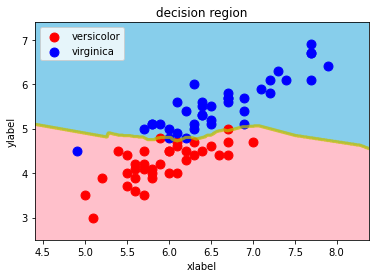

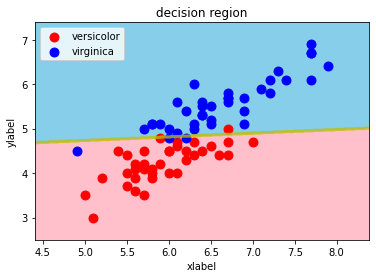

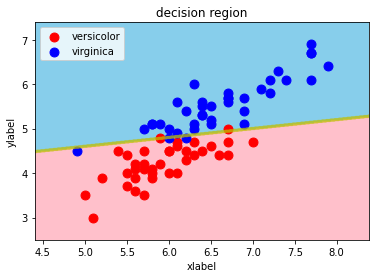

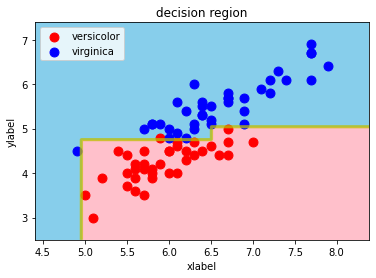

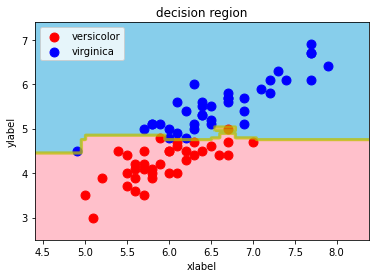

In [ ]:
"""未標準化の図"""
#k-NN
decision_region(x_train,y_train,model=k)

#Logistic
decision_region(x_train,y_train,model=l)


#SVM
decision_region(x_train,y_train,model=s)


#Tree
decision_region(x_train,y_train,model=t)


#RandomTree
decision_region(x_train,y_train,model=r)

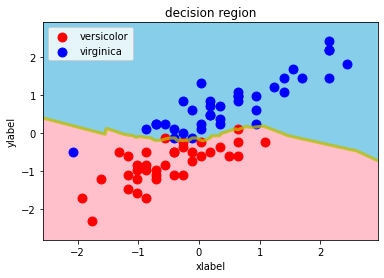

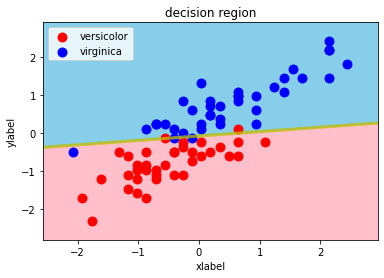

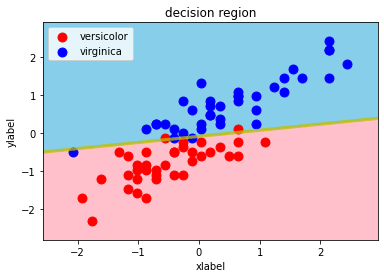

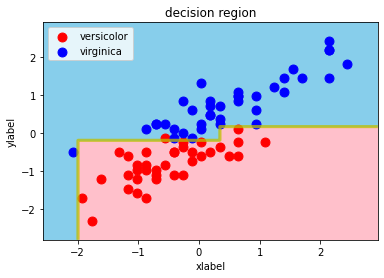

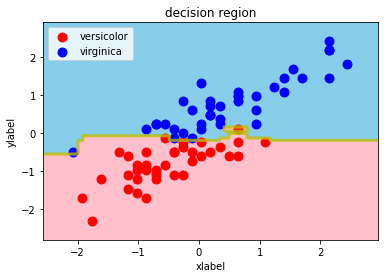

In [ ]:
"""標準化の図"""

decision_region(x_train_trf,y_train,model=neigh)
decision_region(x_train_trf,y_train,model=lr)
decision_region(x_train_trf,y_train,model=sv)
decision_region(x_train_trf,y_train,model=tr)
decision_region(x_train_trf,y_train,model=rf)

In [ ]:
"""考察"
図の差異は大きな変化はなし
ただし、評価において、ランダムフォレストは標準化していないと精度が低下する。recallとF値も全体的に低下している"""

問題10 （アドバンス課題）全ての目的変数を使用して精度が高い手法